In [1]:
#importo las funciones para levantar los dataframes
%run "../../utils/dataset_parsing.ipynb"
#importo las funciones para graficar
%run "../../utils/graphs.ipynb"
df = levantar_datos("../../"+DATASET_RELATIVE_PATH)
df.columns

In [61]:
grouped = df.groupby(["ano","mes"]).aggregate({"id": "count"}).unstack()
grouped.columns = grouped.columns.droplevel()

In [62]:
grouped

mes,1,2,3,4,5,6,7,8,9,10,11,12
ano,,,,,,,,,,,,
2012,1528,1327,1103,1434,1857,1524,1973,3971,2598,3161,1608,1450
2013,1993,1401,1734,1829,2000,2016,2524,2374,3321,4056,4012,3126
2014,2403,2534,2916,2780,3071,3082,3125,3583,3911,3811,4613,4743
2015,4310,3869,3957,3783,3696,3804,3875,4526,4863,5552,4906,4329
2016,5775,4592,5022,6640,5438,6795,6013,6443,5929,6726,6086,28579


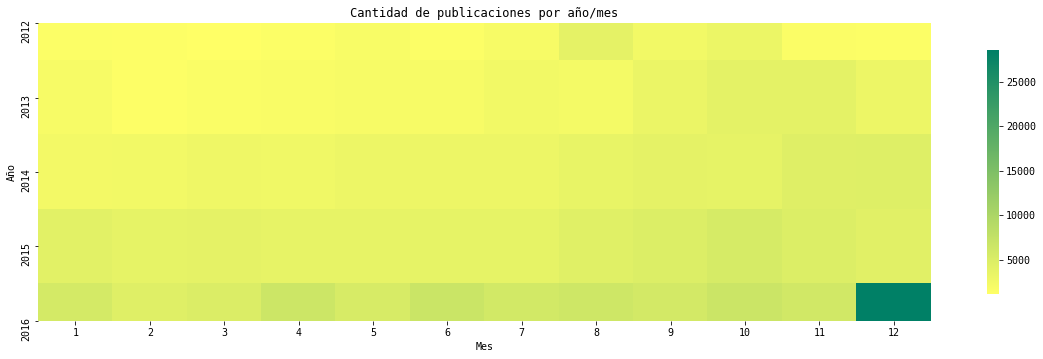

In [18]:
get_heatmap(grouped, title="Cantidad de publicaciones por año/mes")

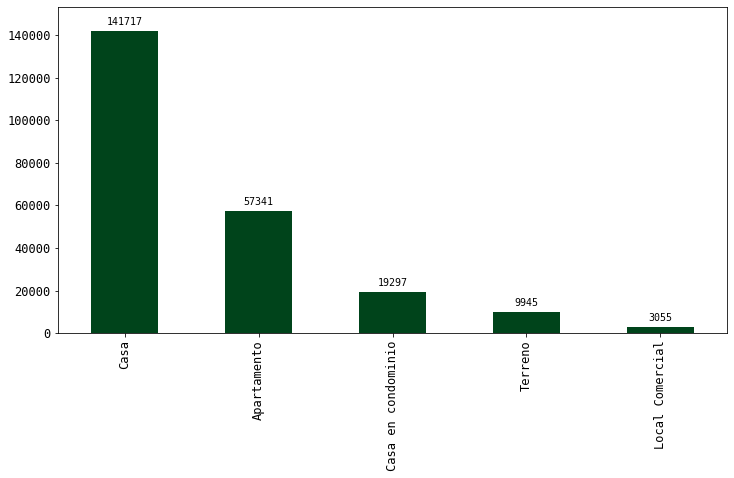

In [23]:
get_barplot(df.tipodepropiedad.value_counts().head(5))

In [53]:
top_3 = df["tipodepropiedad"].isin(["Apartamento", "Casa", "Casa en condominio"])
grouped_by_type = df.loc[top_3].groupby(["tipodepropiedad","mes","ano"]).aggregate({"precio": "count"}).unstack(fill_value=0).unstack(fill_value=0)
grouped_by_type.columns = grouped_by_type.columns.droplevel()
grouped_by_type

ano                2012                                                   ...  \
mes                  1    2    3    4    5    6     7     8     9     10  ...   
tipodepropiedad                                                           ...   
Apartamento         322  294  263  315  388  355   406   834   523   606  ...   
Casa                864  738  578  767  993  851  1145  2367  1597  2013  ...   
Casa en condominio  206  187  172  253  339  225   276   444   235   236  ...   

ano                 2016                                                  \
mes                   3     4     5     6     7     8     9     10    11   
tipodepropiedad                                                            
Apartamento         1202  1683  1275  1518  1440  1504  1346  1623  1556   
Casa                2871  3843  3138  4118  3535  3720  3533  3950  3504   
Casa en condominio   454   545   491   529   482   573   421   461   416   

ano                        
mes                    12  
tipodepropiedad            
Apartamento          7497  
Casa                16145  
Casa en condominio   2240  

[3 rows x 60 columns]

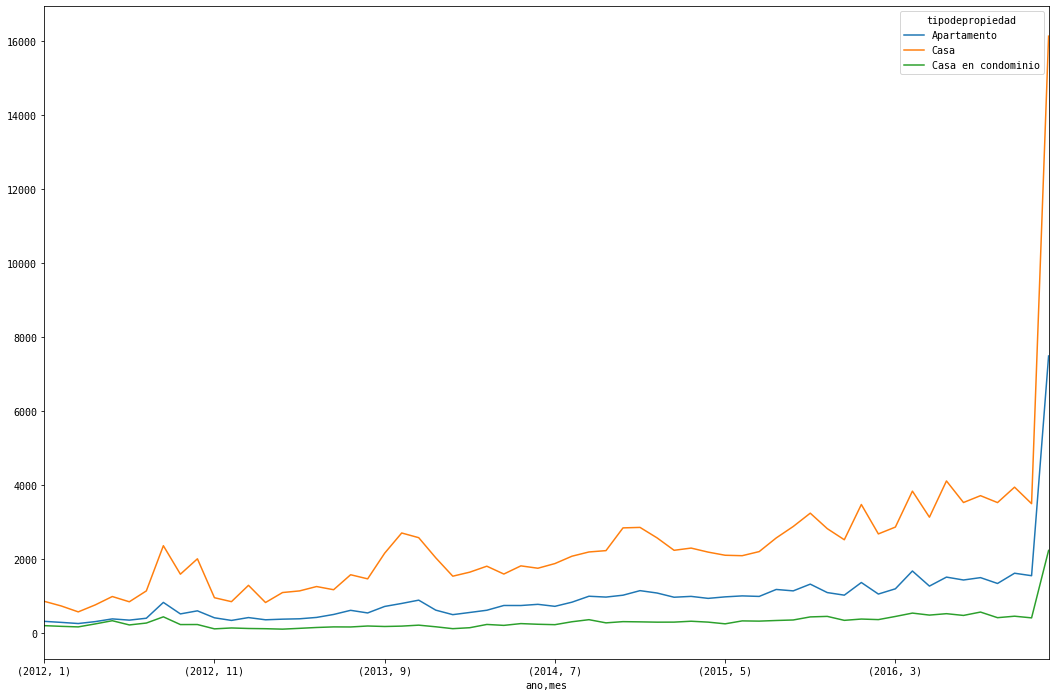

In [54]:
grouped_by_type.T.plot(figsize=(18,12))

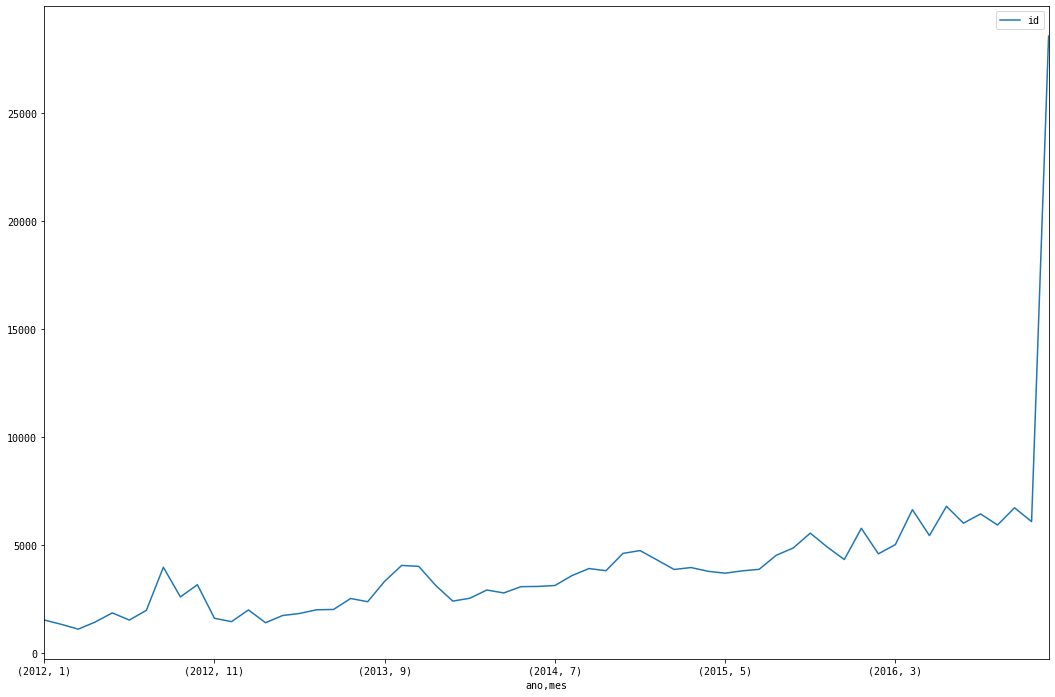

In [60]:
df.groupby(["ano","mes"]).aggregate({"id": "count"}).plot(figsize=(18,12), logy=False)

In [81]:
tipo_zona = df.groupby(["tipodepropiedad"]).aggregate({"idzona": "count", "id": "count"}).sort_values(by="id", ascending=False).head(5)
tipo_zona["proporcion"] = 100 * tipo_zona["idzona"] / tipo_zona["id"]
tipo_zona.sort_values(by="idzona", ascending=False)

,idzona,id,proporcion
tipodepropiedad,,,
Casa,123156,141717,86.902771
Apartamento,52779,57341,92.044087
Casa en condominio,16657,19297,86.319117
Terreno,8678,9945,87.259930
Local Comercial,2659,3055,87.037643


In [91]:
# todas las columnas que tienen latitud tienen tambien longitud
df.loc[df["lat"].isna() != df["lng"].isna()].shape

(0, 26)

In [102]:
df["has_gps"] = ~ (df["lat"].isna() & df["lng"].isna())
tipo_zona = df.groupby(["tipodepropiedad"]).aggregate({"has_gps": "sum", "id": "count"}).sort_values(by="id", ascending=False)
tipo_zona["proporcion"] = 100 * tipo_zona["has_gps"] / tipo_zona["id"]
tipo_zona.sort_values(by="has_gps", ascending=False)

,has_gps,id,proporcion
tipodepropiedad,,,
Casa,65628.0,141717,46.309194
Apartamento,30035.0,57341,52.379624
Casa en condominio,9733.0,19297,50.437892
Terreno,4913.0,9945,49.401709
Local Comercial,1641.0,3055,53.715221
Oficina comercial,932.0,1741,53.532453
Edificio,802.0,1396,57.449857
Bodega comercial,696.0,1406,49.502134
Terreno comercial,669.0,1326,50.452489
